# Time Series Analysis

## Business Understanding


### Introduction
Accurate sales forecasting is essential for maximising inventory, resource allocation, and decision-making processes in the dynamic world of retail. In this project, we delve into the realm of time series forecasting for store sales, aiming to provide a robust predictive model for Favorita, a leading Ecuadorian-based grocery retailer. By harnessing the power of data and advanced analytics, we seek to enhance Favorita's operations, improve customer satisfaction, and drive business growth.

### Business Objective
The main objective of this project is to develop a robust and accurate time series forecasting model that predicts store sales for a wide range of products across Favorita stores. By leveraging historical sales data and relevant supplementary information, the model aims to provide reliable forecasts that enable Favorita to optimize its inventory management, resource allocation, and marketing strategies. The successful implementation of this model will contribute to improved operational efficiency, enhanced decision-making, and increased profitability for the retailer.

### Business Goals
The key business goals of this project include:

- Improved Inventory Management: Accurate sales predictions will enable Favorita to manage inventory levels efficiently. 

- Enhanced Resource Allocation: With precise sales forecasts, Favorita can allocate human resources and logistics more effectively, ensuring that stores have adequate staff and supplies to meet customer demand.

- Marketing and Promotion Strategies: By understanding the impact of promotions on sales, Favorita can tailor its marketing strategies to boost sales during specific periods. 

- Optimized Financial Planning: Accurate sales predictions facilitate better financial planning and budgeting.


### Data Reqirements
To successfully achieve the objectives of this project and build an accurate time series forecasting model for store sales, the following data is required:

1.  Historical Sales Data
        
2.  Transaction Data
        

3.  Store Metadata 
       

4.  Oil Price Data 
        

5.  Holidays and Events Data 
        


***Analytical Questions***: 

- Is the train dataset complete (has all the required dates)?

- Which dates have the lowest and highest sales for each year (excluding days the store was closed)?
- Compare the sales for each month across the years and determine which month of which year had the highest sales.
- Did the earthquake impact sales?
- Are certain stores or groups of stores selling more products? (Cluster, city, state, type)
- Are sales affected by promotions, oil prices and holidays?
- What analysis can we get from the date and its extractable features?
- Which product family and stores did the promotions affect.
- What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)
- Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.

## Data Understanding

### Data Collection
Data for this project will be collected from 3 places, a database, OneDrive and GitHub

### Data Description
The training data includes dates, store, and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models

**File Descriptions and Data Field Information**

train.csv

- The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.

- **store_nbr** identifies the store at which the products are sold.

- **family** identifies the type of product sold.

- **sales** gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

- **onpromotion** gives the total number of items in a product family that were being promoted at a store at a given date.

test.csv

- The test data, having the same features as the training data. You will predict the target sales for the dates in this file.

- The dates in the test data are for the 15 days after the last date in the training data.

transaction.csv

- Contains date, store_nbr and transaction made on that specific date.

sample_submission.csv

- A sample submission file in the correct format.

stores.csv

- Store metadata, including city,state, type, and cluster.

- cluster is a grouping of similar stores.

oil.csv

- **Daily oil price** which includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices.)

holidays_events.csv

- Holidays and Events, with metadata

Additional holidays are days added, a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

Additional Notes

- Wages in the public sector are paid every two weeks on the 15th and on the last day of the month. Supermarket sales could be affected by this.

- A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

In [1]:
#import all necessary libraries

# data manipulation tools
import pandas as pd
import numpy as np
import missingno as msno
from itertools import product

# data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# statistics librabry  
from scipy import stats
#from scipy.stats import randint,uniform, mannwhitneyu
import statistics as  stat

# database connections
import pyodbc
from dotenv import load_dotenv,dotenv_values

# data preprocessing packages
from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder,LabelEncoder, RobustScaler,FunctionTransformer
#from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline as ImbPipeline


# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from catboost import CatBoostClassifier

# metrics packages
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV
# roc curve
# smote for balancing
# feature importance

# saving machine learning models
#import joblib


# hide warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
 

In [2]:
# load environment variables
environment_variables = dotenv_values(".env")

# load database configurations
database = environment_variables.get("DBN")
server = environment_variables.get("DBS")
username = environment_variables.get("DBU")
password = environment_variables.get("DBP")

# database connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"



In [3]:
# create pyodbc connector
connection = pyodbc.connect(connection_string)

In [4]:
# Loading first table from MS SQL server
query = " SELECT * FROM dbo.oil"
df1 = pd.read_sql(query, connection)
df1.head(2)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14


In [5]:
# Loading second table from MS SQL server
query = " SELECT * FROM dbo.holidays_events"
df2 = pd.read_sql(query, connection)
df2.head(2)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False


In [6]:
# Loading third table from MS SQL server
query = " SELECT * FROM dbo.stores"
df3 = pd.read_sql(query, connection)
df3.head(2)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13


In [7]:
# load second dataset
df4 = pd.read_csv("../Time_Series_Analysis/transactions.csv")
df4.head(2)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111


In [8]:
# load third dataset
train_df = pd.read_csv("../Time_Series_Analysis/train.csv")
train_df.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0
1,1,2013-01-01,1,BABY CARE,0.00,0


In [9]:
# load test dataset
test_df = pd.read_csv("../Time_Series_Analysis/test.csv")
test_df.head(2)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0


#### Shape of the datasets


In [10]:
# Print out the shapes of all the datasets
print(f"Train Dataset: {train_df.shape}")
print(f"Test Datasets: {test_df.shape}")
print("Shapes of Each Dataset:")
print(f"Holiday Events Dataset: {df2.shape}")
print(f"Oil Dataset: {df1.shape}")
print(f"Stores Dataset: {df3.shape}")
print(f"Transactions Dataset: {df4.shape}")

Train Dataset: (3000888, 6)
Test Datasets: (28512, 5)
Shapes of Each Dataset:
Holiday Events Dataset: (350, 6)
Oil Dataset: (1218, 2)
Stores Dataset: (54, 5)
Transactions Dataset: (83488, 3)


### ***Key Insights***
The train dataset contains 3,000,888 rows and 6 columns while the test dataset contains 28,512 rows and 5 columns.

The train dataset is significantly larger than the test dataset in terms of the number of rows. This is expected, as the train dataset is usually larger to provide sufficient data for model training.
The Holiday Events dataset contains 350 rows and 6 columns. This dataset provides information about various holidays and events.

The Oil dataset consists of 1,218 rows and 2 columns. This dataset includes information about the daily price of oil.

The Stores dataset contains 54 rows and 5 columns. This dataset provides details about different stores, such as their locations, types, and clusters.

The Transactions dataset contains 83,488 rows and 3 columns. This dataset contains information about the number of transactions made at each store on specific dates.

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [12]:
# Get the column information of each dataset
# Function to display column information of the datasets
def column_info(dataset_name, dataset):
    print(f"Data types for the {dataset_name} dataset:")
    print(dataset.info())
    print('='*58)

In [13]:
# Column information of all the datasets
column_info('Train', train_df)
print()
column_info('Test', test_df)
print()
column_info('Holiday events', df2)
print()
column_info('Oil',df1)
print()
column_info('Stores', df3)
print()
column_info('Transactions', df4)

Data types for the Train dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None

Data types for the Test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None

Data types for the Holiday events dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

#### Converting the 'date' column to datetime format

In [14]:
# Converting the 'date' column in the datasets to datetime format
# Train dataset
train_df['date'] = pd.to_datetime(train_df['date'])

# Test dataset
test_df['date'] = pd.to_datetime(test_df['date'])

# Oil dataset
df1['date'] = pd.to_datetime(df1['date'])

# Holiday Events dataset
df2['date'] = pd.to_datetime(df2['date'])

# Transactions dataset
df4['date'] = pd.to_datetime(df4['date'])

In [18]:
train_df.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

#### Checking for nulls


In [15]:
# Checking for missing values in the datasets
# Function to display summary statistics of the datasets
def missing_values(dataset_name, dataset):
    print(f"Missing {dataset_name} dataset :")
    print(dataset.isnull().sum())
    print('='*58)

In [16]:
# Missing values of all the datasets
missing_values('Train', train_df)
print()
missing_values('Test', test_df)
print()
missing_values('Holiday events', df2)
print()
missing_values('Oil', df1)
print()
missing_values('Stores', df3)
print()
missing_values('Transactions', df4)

Missing Train dataset :
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Missing Test dataset :
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

Missing Holiday events dataset :
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Missing Oil dataset :
date           0
dcoilwtico    43
dtype: int64

Missing Stores dataset :
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Missing Transactions dataset :
date            0
store_nbr       0
transactions    0
dtype: int64


In [17]:
train_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,3000888.00,1500443.50,0.00,750221.75,1500443.50,2250665.25,3000887.00,866281.89
date,3000888,2015-04-24 08:27:04.703088384,2013-01-01 00:00:00,2014-02-26 18:00:00,2015-04-24 12:00:00,2016-06-19 06:00:00,2017-08-15 00:00:00,NaN
store_nbr,3000888.00,27.50,1.00,14.00,27.50,41.00,54.00,15.59
sales,3000888.00,357.78,0.00,0.00,11.00,195.85,124717.00,1102.00
onpromotion,3000888.00,2.60,0.00,0.00,0.00,0.00,741.00,12.22


In [19]:
train_df.set_index('date', inplace=True)
train_df.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.00,0
2013-01-01,1,1,BABY CARE,0.00,0
2013-01-01,2,1,BEAUTY,0.00,0
2013-01-01,3,1,BEVERAGES,0.00,0
2013-01-01,4,1,BOOKS,0.00,0


In [20]:
train_df.sort_index(ascending=True)

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.00,0
2013-01-01,1,1,BABY CARE,0.00,0
2013-01-01,2,1,BEAUTY,0.00,0
2013-01-01,3,1,BEVERAGES,0.00,0
2013-01-01,4,1,BOOKS,0.00,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.13,0
2017-08-15,3000884,9,PREPARED FOODS,154.55,1
2017-08-15,3000885,9,PRODUCE,2419.73,148


In [21]:
train_df.store_nbr.unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [22]:
start_day = train_df.index.min()
end_day = train_df.index.max()

print(f'The start day is {start_day} and end date is {end_day}')

The start day is 2013-01-01 00:00:00 and end date is 2017-08-15 00:00:00


In [23]:
date_range = pd.date_range(start=start_day, end=end_day,)
date_range

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [24]:
dates_present = train_df.index

missing_dates = date_range.difference(dates_present)
missing_dates

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

In [25]:


# Create a DataFrame with unique values of other columns
unique_store_numbers = train_df['store_nbr'].unique()
#unique_ids = train_df['id'].unique()
unique_category = train_df['family'].unique() # Default value for missing on_promotion

# Create a DataFrame with missing dates and unique values of other columns
missing_df = pd.DataFrame(list(product(unique_store_numbers, missing_dates, unique_category)),
                          columns=['store_nbr', 'date', 'family'])

missing_df.set_index('date', inplace=True)

# Merge missing_df with train_df
merged_df = pd.concat([train_df, missing_df],axis = 0) #ignore_index=True)

# Sort the DataFrame by date
merged_df.sort_index(ascending=True)



,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0.00,1,AUTOMOTIVE,0.00,0.00
2013-01-01,1194.00,42,CELEBRATION,0.00,0.00
2013-01-01,1193.00,42,BREAD/BAKERY,0.00,0.00
2013-01-01,1192.00,42,BOOKS,0.00,0.00
2013-01-01,1191.00,42,BEVERAGES,0.00,0.00
...,...,...,...,...,...
2017-08-15,2999695.00,25,POULTRY,172.52,0.00
2017-08-15,2999694.00,25,PLAYERS AND ELECTRONICS,3.00,0.00
2017-08-15,2999693.00,25,PET SUPPLIES,3.00,0.00


In [26]:
merged_df.isnull().sum()


id             7128
store_nbr         0
family            0
sales          7128
onpromotion    7128
dtype: int64

In [29]:
# interpolate missing values
# Interpolate other columns (sales, on_promotion) for missing dates
merged_df['sales'] = merged_df['sales'].interpolate(method='time')
merged_df['onpromotion'] = merged_df['onpromotion'].interpolate(method='time')
merged_df['id'] = merged_df['id'].interpolate(method='linear')



In [30]:
merged_df.isnull().sum()

id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

## Univariate Analysis

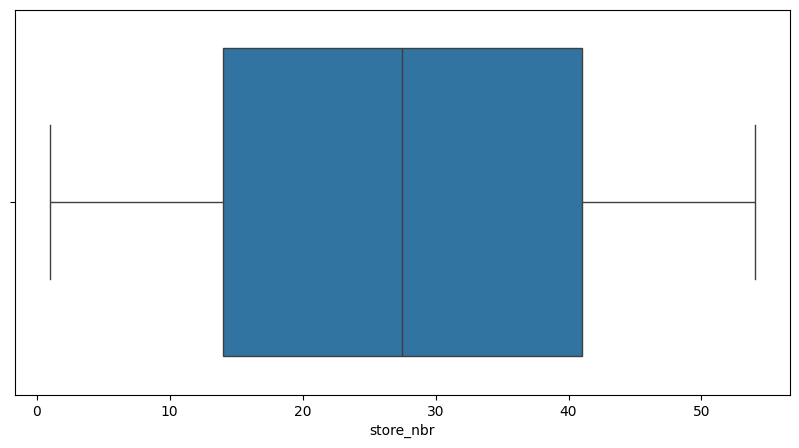

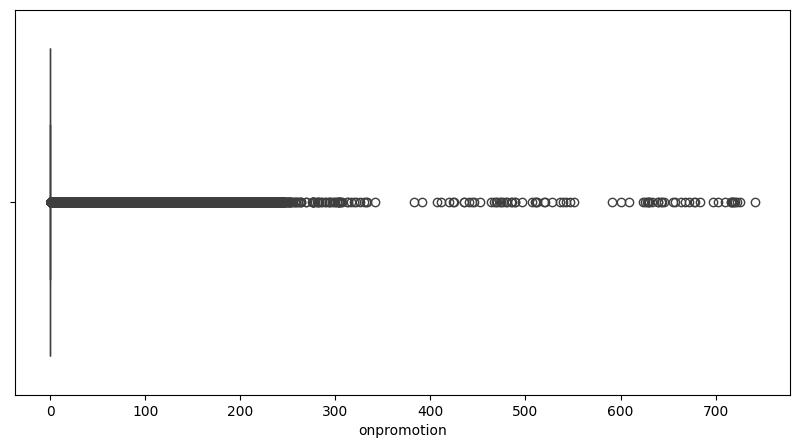

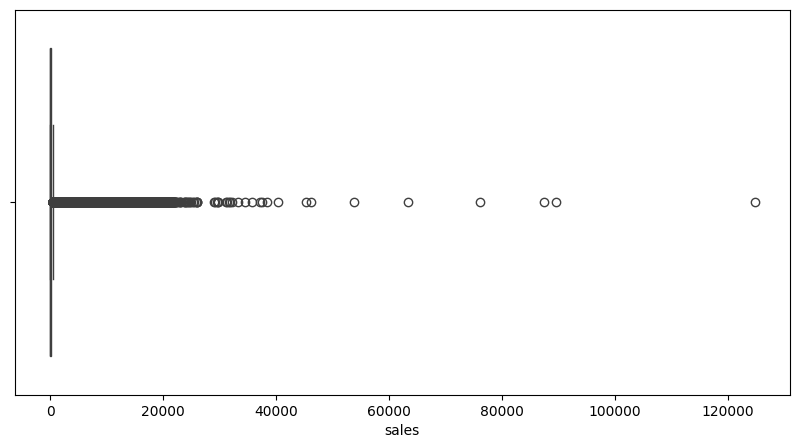

In [55]:
plt.figure(figsize= (10,5))
sns.boxplot(merged_df['store_nbr'], orient='h')

plt.figure(figsize= (10,5))
sns.boxplot(merged_df['onpromotion'], orient='h')
plt.show()


plt.figure(figsize= (10,5))
sns.boxplot(merged_df['sales'], orient='h')
plt.show()


<Axes: ylabel='Density'>

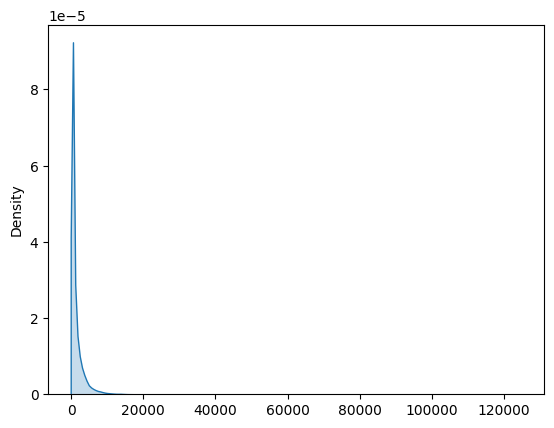

In [60]:
sns.kdeplot(merged_df.drop([ 'family','onpromotion'], axis=1).values.ravel(), fill=True)

In [96]:


# Select only numeric columns
numeric_columns = merged_df.select_dtypes(include=['number'])

# Check the skewness of numeric columns
skewness = numeric_columns.skew()

print(skewness)


store_nbr      0.00
sales          7.35
onpromotion   11.18
dtype: float64


The data is positively skewed.

## Bivariate Analysis

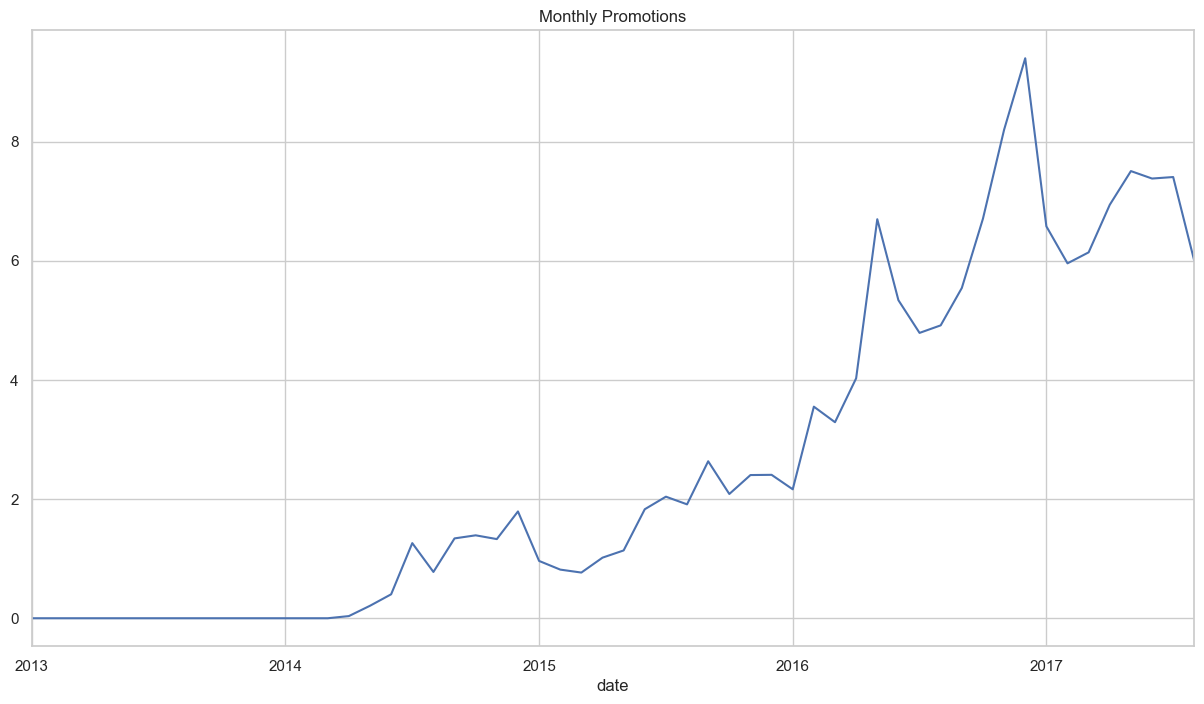

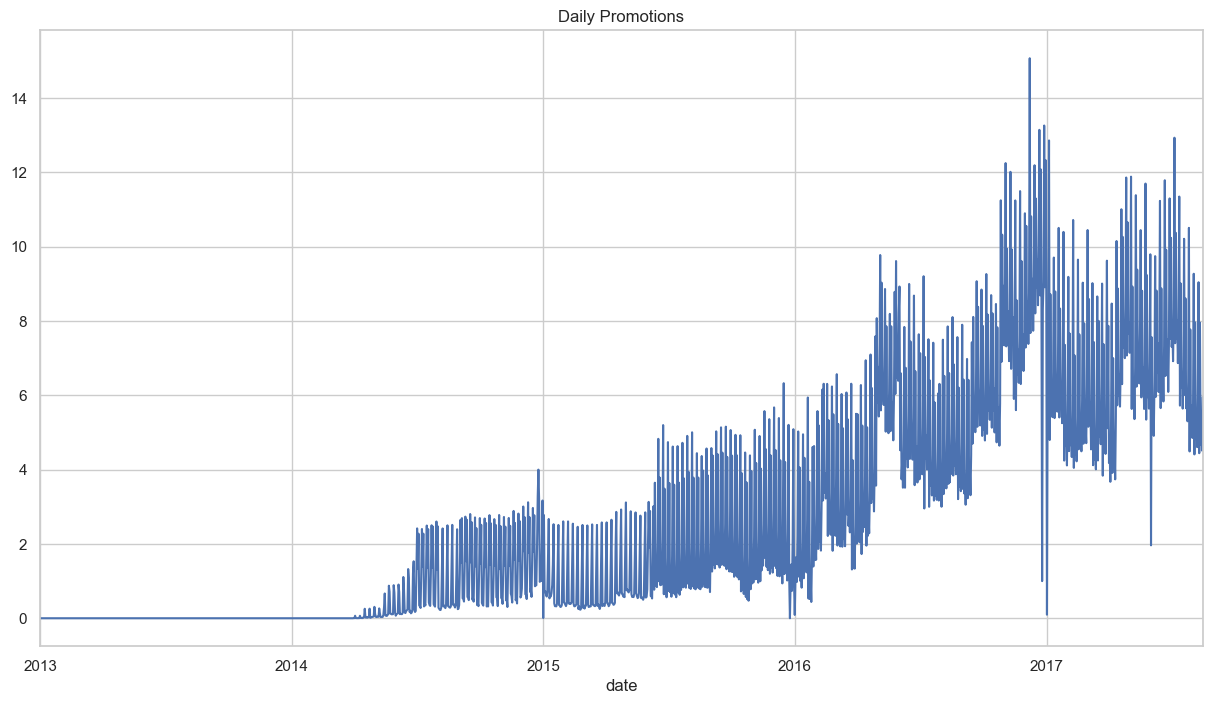

In [35]:
# Plotting the "onpromotion" column


# Resample on promotion by month
month_promo = merged_df["onpromotion"].resample("M").mean()

# Using matplotlib to visualize
plt.figure(figsize=(15, 8))  # Adjust the values (width, height) as needed
ax = month_promo.plot()

# Adding a title to the plot
plt.title('Monthly Promotions')

plt.show()

# Resample on promotion by day
daily_promo = merged_df["onpromotion"].resample("D").mean()

# Using matplotlib to visualize 
plt.figure(figsize=(15, 8)) 
ax = daily_promo.plot()

# Adding a title to the plot
plt.title('Daily Promotions')
plt.show()


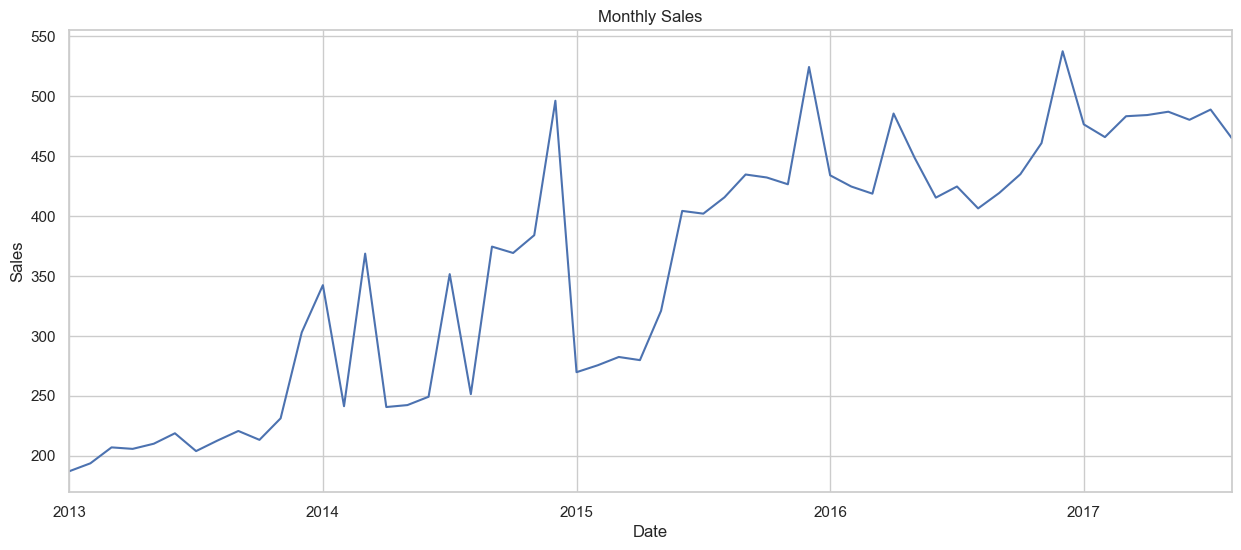

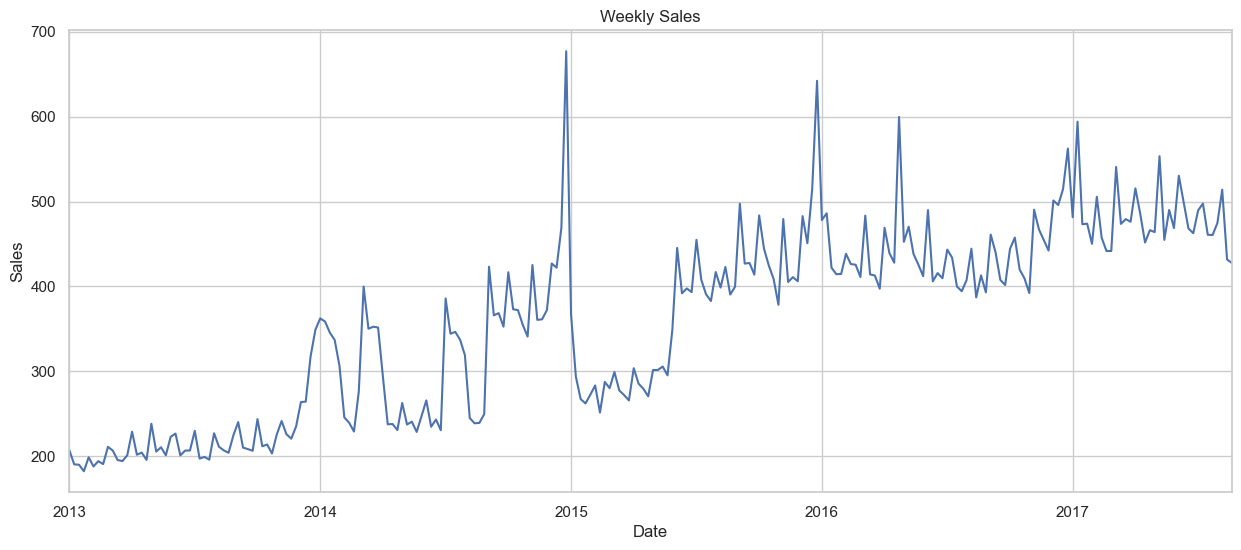

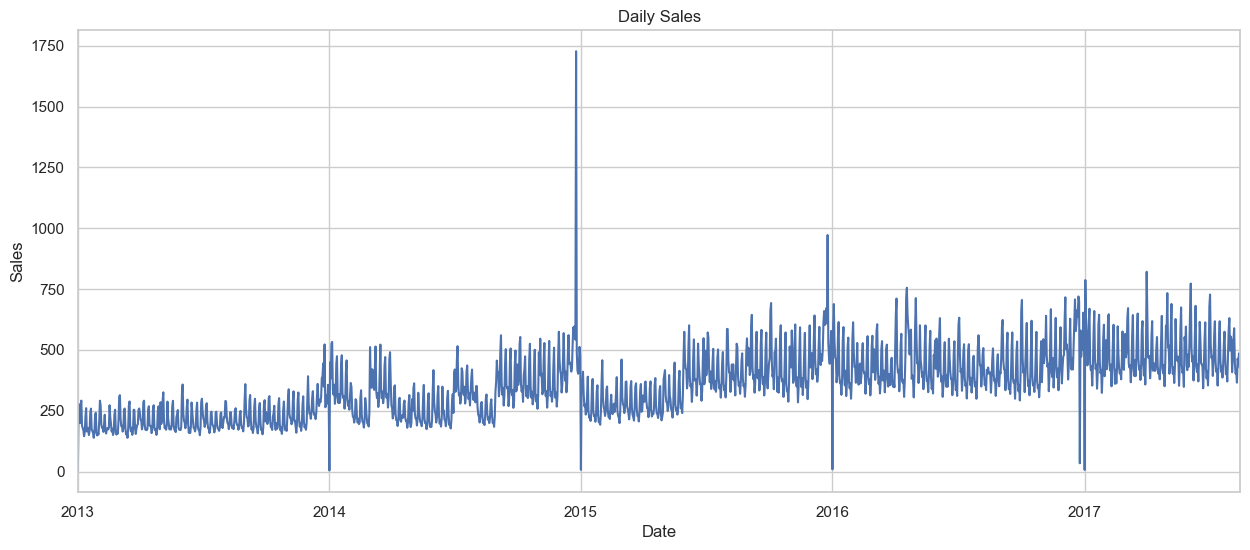

In [37]:

# Monthly resampling
sale_monthly = merged_df["sales"].resample("M").mean()

plt.figure(figsize=(15, 6))
plt.title("Monthly Sales")
sale_monthly.plot()
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Weekly resampling
sale_weekly = merged_df["sales"].resample("W").mean()

plt.figure(figsize=(15, 6))
plt.title("Weekly Sales")
sale_weekly.plot()
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Daily resampling
sale_daily = merged_df["sales"].resample("D").mean()

plt.figure(figsize=(15, 6))
plt.title("Daily Sales")
sale_daily.plot()
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

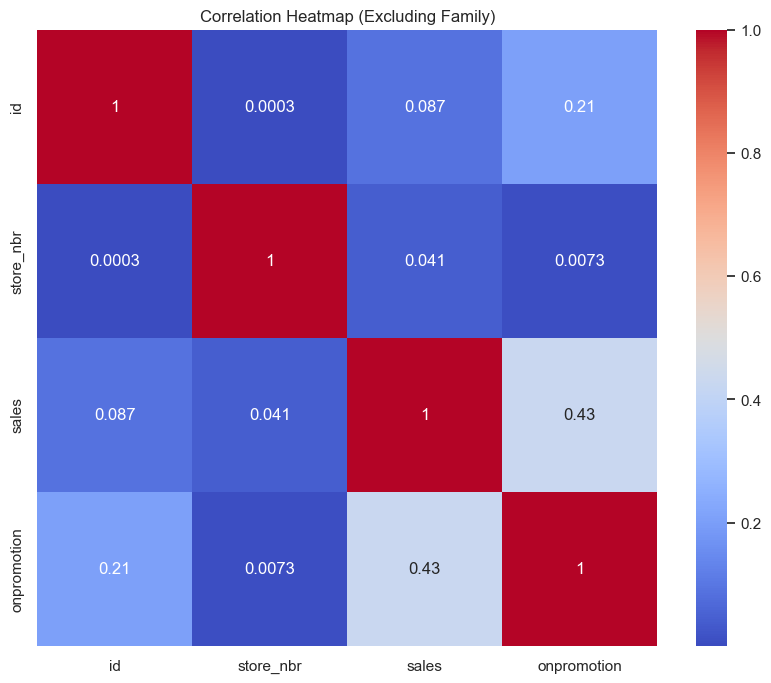

In [38]:
# Exclude the 'family' column
corr_matrix = merged_df.drop(columns=['family']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Excluding Family)')
plt.show()

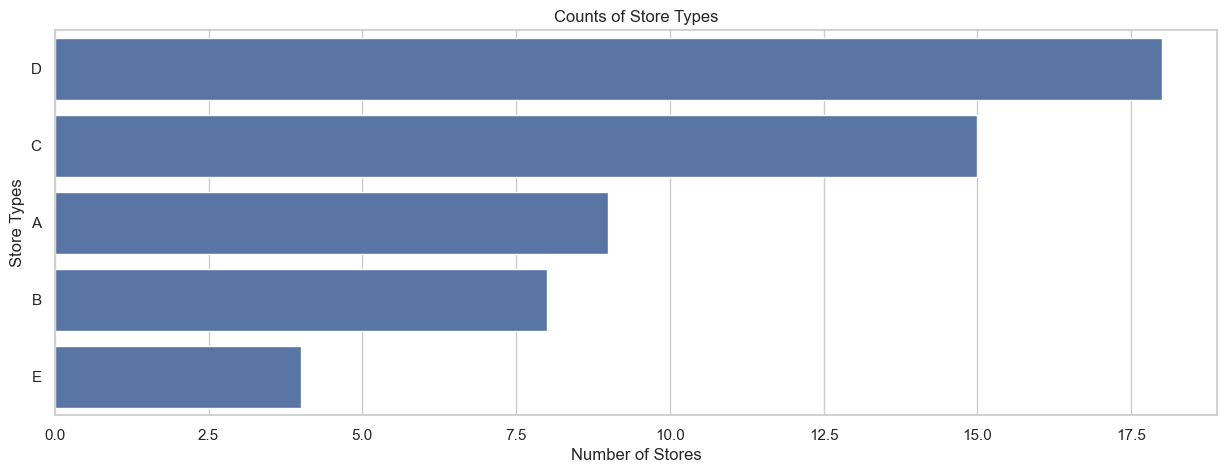

In [39]:
# Compute counts of each store type
stores = df3['type'].value_counts()

# Visualization
plt.figure(figsize=(15, 5))

sns.barplot(x=stores.values, y=stores.index)
plt.title('Counts of Store Types')
plt.ylabel('Store Types')
plt.xlabel("Number of Stores")
plt.show()

## Analytical questions
Q1

Is the train dataset complete (has all the required dates)?

In [40]:
print(f"The train dataset is missing the following dates:\n{missing_dates}")

The train dataset is missing the following dates:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [31]:
dates_presents = merged_df.index

missing_date = date_range.difference(dates_presents)
missing_date

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

Q2

Which dates have the lowest and highest sales for each year (excluding days the store was closed)?


In [66]:
df2.type.value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

In [79]:
#Filtering for days the store was not closed
filtered_df = df2[((df2['type'] == 'Holiday')  & (df2['transferred'] == True) | (df2['type'] == 'Work Day') | (df2['type'] == 'Event'))]
filtered_df.sort_values(by='date', ascending=True)


,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
55,2013-05-12,Event,National,Ecuador,Dia de la Madre,False
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
...,...,...,...,...,...,...
311,2017-05-14,Event,National,Ecuador,Dia de la Madre,False
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
328,2017-09-28,Holiday,Local,Ibarra,Fundacion de Ibarra,True


In [84]:
# Convert the 'date' column to datetime
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

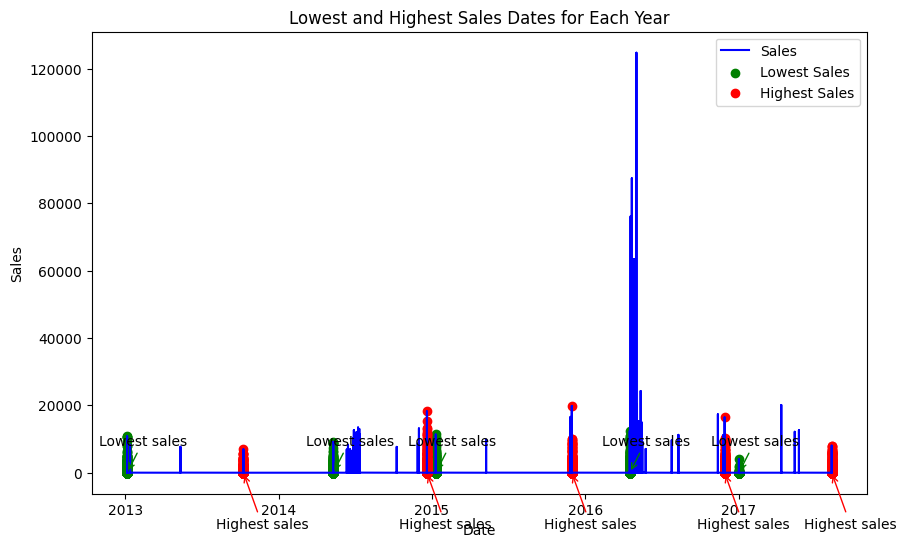

In [89]:


# 1. Merge the sales data with the year information
merged_data = pd.merge(filtered_df, merged_df, on='date', how='inner')

# 2. Extract year from the date column
merged_data['year'] = merged_data['date'].dt.year

# 3. Group by year and find dates with lowest and highest sales
lowest_sales_dates = merged_data.groupby('year')['date'].min()
highest_sales_dates = merged_data.groupby('year')['date'].max()

# 4. Extract corresponding sales values for lowest and highest sales dates
lowest_sales = merged_data[merged_data['date'].isin(lowest_sales_dates)]
highest_sales = merged_data[merged_data['date'].isin(highest_sales_dates)]

# 5. Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(merged_data['date'], merged_data['sales'], color='blue', label='Sales')
plt.scatter(lowest_sales['date'], lowest_sales['sales'], color='green', label='Lowest Sales')
plt.scatter(highest_sales['date'], highest_sales['sales'], color='red', label='Highest Sales')

# Annotate lowest and highest sales dates
for i, year in enumerate(lowest_sales['year'].unique()):
    plt.annotate('Lowest sales', xy=(lowest_sales_dates[year], lowest_sales[lowest_sales['year'] == year]['sales'].values[0]), xytext=(-20, 20), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='green'))
    plt.annotate('Highest sales', xy=(highest_sales_dates[year], highest_sales[highest_sales['year'] == year]['sales'].values[0]), xytext=(-20, -40), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='red'))

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Lowest and Highest Sales Dates for Each Year')
plt.legend()
plt.show()


Q3

Did the earthquake impact sales?


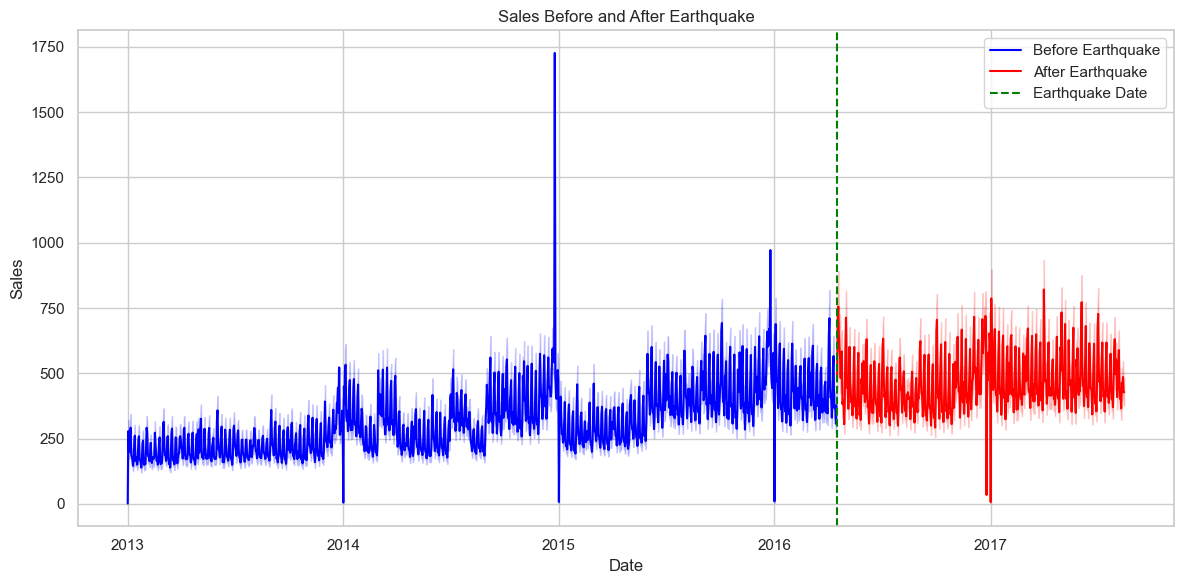

In [44]:
# Filter data for the period before and after the earthquake
earthquake_date = "2016-04-16"
post_earthquake = merged_df[merged_df.index >= earthquake_date]
pre_earthquake = merged_df[merged_df.index < earthquake_date]

plt.figure(figsize=(12,6))
# Spliting the data into pre and post-earthquake periods
sns.lineplot(data=pre_earthquake, x='date', y='sales', label='Before Earthquake', color='blue')
sns.lineplot(data=post_earthquake, x='date', y='sales', label='After Earthquake', color='red')

# Create a line plot to visualize sales before and after the earthquake
plt.axvline(pd.to_datetime(earthquake_date), color='green', linestyle='--', label='Earthquake Date')

plt.title("Sales Before and After Earthquake")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Q4

Are there certain product families types that exhibit higher sales performance?

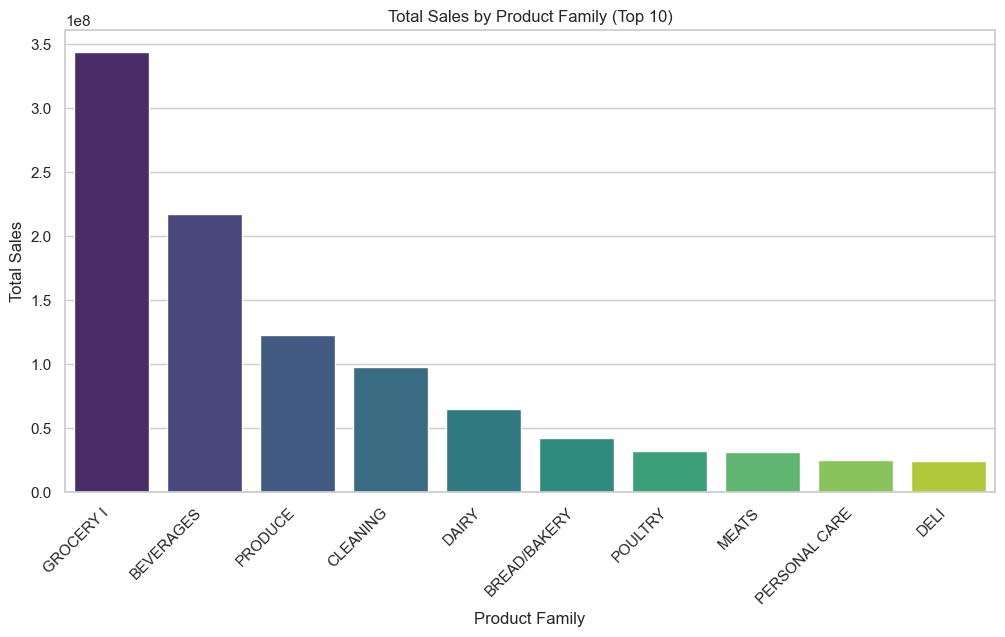

In [45]:
# Group the data by product family and calculate the total sales
family_sales = merged_df.groupby('family')['sales'].sum().sort_values(ascending=False)

# Select the top 10 product families
top_10_families = family_sales.head(10)

# Plot the relationship between product family and sales for the top 10 families
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_families.index, y=top_10_families.values, palette='viridis')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Family (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.show()

Are certain stores or groups of stores selling more products? (Cluster, city, state, type)
Are sales affected by promotions, oil prices and holidays?
What analysis can we get from the date and its extractable features?
Which product family and stores did the promotions affect.
What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)
Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.
Compare the sales for each month across the years and determine which month of which year had the highest sales.